# Principal Component Analysis of Two Genes Over Time


#### Question 1: Exploring Gene Space
Imagine that we are doing a set of experiments on yeast cells to understand how they respond to environmental perturbations.

Consider the data matrix X below where each row corresponds to a gene (call them gene 1 and gene 2), and each column
corresponds to an assay (an experimental condition). Let’s say the first five columns are assays every 10 min following heat shock, and the second five columns are assays every 10 min following a shift from glucose to glycerol.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 2, 4, 8, 10, 0, 3, 6, 7.5, 10],[.5, 1, 1.8, 2.4, 3, 5, 3.3, 2, .9, 0]])

X

array([[ 0. ,  2. ,  4. ,  8. , 10. ,  0. ,  3. ,  6. ,  7.5, 10. ],
       [ 0.5,  1. ,  1.8,  2.4,  3. ,  5. ,  3.3,  2. ,  0.9,  0. ]])

#### Question 1.1
Plot the data points in gene 1 - gene 2 space.

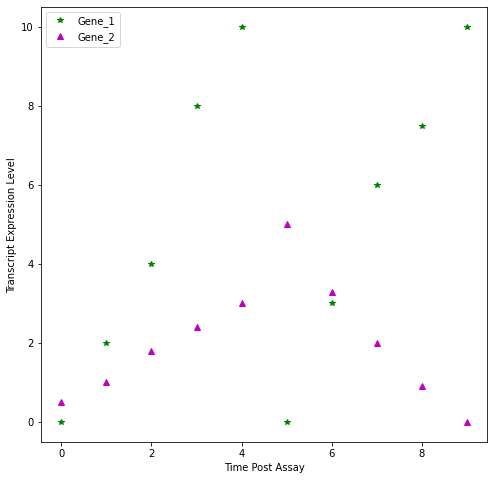

In [44]:
post_assay = np.arange(0,10,1) #create the space to graph genes

gene_1 = X[0,:] #assigning gene 1 & 2 to their own variables 
gene_2 = X[1,:]

plt.plot(post_assay, gene_1, 'g*', post_assay, gene_2, 'm^')
plt.xlabel("Time Post Assay")
plt.ylabel("Transcript Expression Level")
plt.legend(['Gene_1', 'Gene_2'])

plt.show()

#### Question 1.2
What is the mean expression value for each gene?

In [27]:
mean_gene_1 = np.mean(gene_1)
mean_gene_2 = np.mean(gene_2)

print(mean_gene_1)
print(mean_gene_2)

5.05
1.9899999999999998


#### Question 1.3
What is the variance of the expression value for each gene?

In [28]:
var_gene_1 = np.var(gene_1)
var_gene_2 = np.var(gene_2)

print(var_gene_1)
print(var_gene_2)

13.022499999999999
2.0349000000000004


#### Question 1.4
Plot the four time courses (2 genes X 2 conditions) as a function of time with the first measurments being time 0 all on the same plot. What can you say about the how the genes are correlated in their responses to these perturbations?

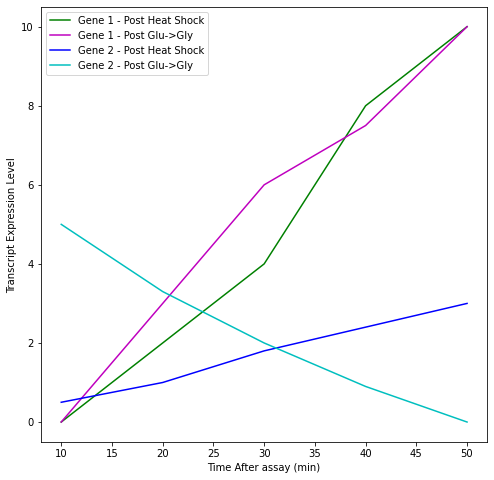

In [67]:
gene_1_h = (X[0, 0:5])
gene_1_g = (X[0, 5:10])

gene_2_h = (X[1, 0:5])
gene_2_g =(X[1, 5:10])

tc = np.arange(10,60,10) #create the space to graph genes
plt.plot(tc, gene_1_h, 'g-', tc, gene_1_g, 'm-', tc, gene_2_h,'b-' ,tc, gene_2_g,'c-' )
plt.xlabel("Time After assay (min)")
plt.ylabel("Transcript Expression Level")
plt.legend(['Gene 1 - Post Heat Shock', 'Gene 1 - Post Glu->Gly', 'Gene 2 - Post Heat Shock', 'Gene 2 - Post Glu->Gly'])


plt.show()

#### 1.4 - Answer: 
* gene 1 linearly increases every ten minutes, in response to both conditions 
* gene 2 linearly decreases every 10 min in response to the glucose --> glycerine shift 
* gene 2 linearly increases (but not as strongly as gene 1) in response to heat shock

#### Question 2: PCA on a data matrix
Perform a Principal Component Analysis of the data in the matrix X:
* Create a new matrix Y by subtracting off the mean expression value for each gene from matrix entries for that gene.
* Evaluate the 2 X 2 gene-covariance matrix C using the data in Y.
* Evaluate the eigenvalues of C.
* What fraction of the total variance of the data is accounted for by the first principal component of C? (The total variance of the data is the sum of the variances of gene 1 and gene 2 that you evaluated earlier.)
* Find the principal component eigenvectors and plot their directions on the same plot as the data points. Don’t forget to order your eigenvectors appropriately.

covariance matrix = [[14.46944444 -1.49388889]
 [-1.49388889  2.261     ]]
PC1 =  [ 0.99280786 -0.11971863]
PC2 = [0.11971863 0.99280786]
Lambda 1 = 14.649586386608089
Lambda 2 = 2.0808580578363545
total variance = 3.9968028886505635e-15
PC1 fraction of total variance = 3665326210658893.5


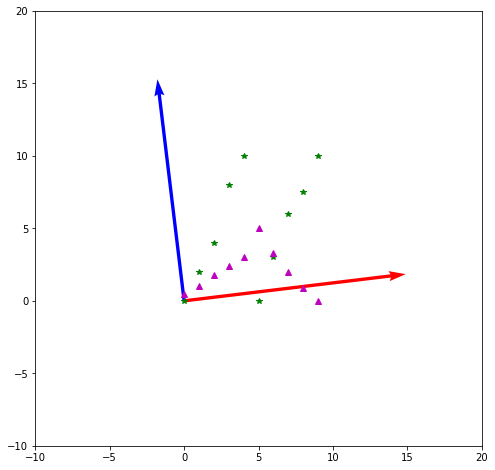

In [141]:
Y = X - np.mean(X, axis = 1).reshape(2,1)
C = np.cov(Y) #covariance matrix is 2x2 

print('covariance matrix =', C)

evals, evecs = np.linalg.eig(C)

#Warning: linalg.eig gives unordered evals and evecs 

idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:,idx] #Columns are eigenvectors (reshuffle columns here)

print('PC1 = ', evecs[:,0])
print('PC2 =', evecs[:,1])
print('Lambda 1 =', evals[0])
print('Lambda 2 =', evals[1])

origin = [np.zeros((1,2))]


plt.quiver(origin, origin, evecs[:,0], evecs[:,1], color = ['r','b'], scale = 2)
plt.plot(gene_1, 'g*', gene_2, 'm^')
plt.xlim((-10,20))
plt.ylim((-10,20))


total_var = np.sum(Y)
print('total variance =',total_var)
print('PC1 fraction of total variance =', evals[0]/(total_var)) 

#### Question 2.1
* Re-express the gene-assay matrix X as a principal component-assay matrix by projecting each data point (column) onto the PCs.
* Plot the reprojected data

Text(0, 0.5, 'Principal Component 2')

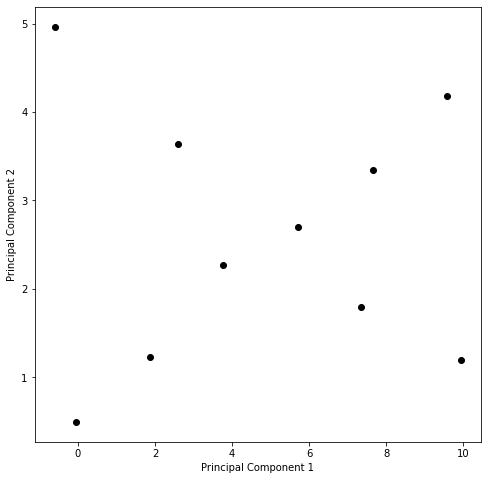

In [130]:
X_reproj = evecs.T @ X

plt.plot(X_reproj[0,:],X_reproj[1,:], 'o', color = 'k')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Question 2.2
* For each principal component (row) of the new matrix plot the data as a time series for each block of assays (the first five columns and the second five columns).
* What can you say about the responses of cells to the two assays, heat shock and shift from glucose to glycerol?

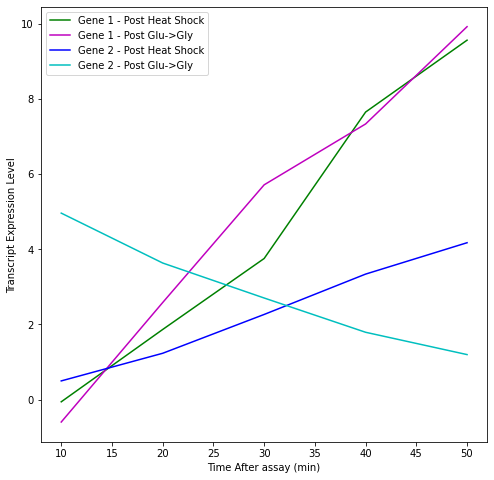

In [131]:
tc = np.arange(10,60,10) #create the space to graph genes
plt.plot(tc, X_reproj[0,0:5], 'g-', tc, X_reproj[0,5:10], 'm-', tc, X_reproj[1,0:5],'b-' ,tc, X_reproj[1,5:10],'c-' )
plt.xlabel("Time After assay (min)")
plt.ylabel("Transcript Expression Level")
plt.legend(['Gene 1 - Post Heat Shock', 'Gene 1 - Post Glu->Gly', 'Gene 2 - Post Heat Shock', 'Gene 2 - Post Glu->Gly'])


plt.show()

#### Question 3: PCA on uncentered data
Let’s see the difference between finding the principal components of uncentered vs. centered data. Imagine you have the following data matrix X2.

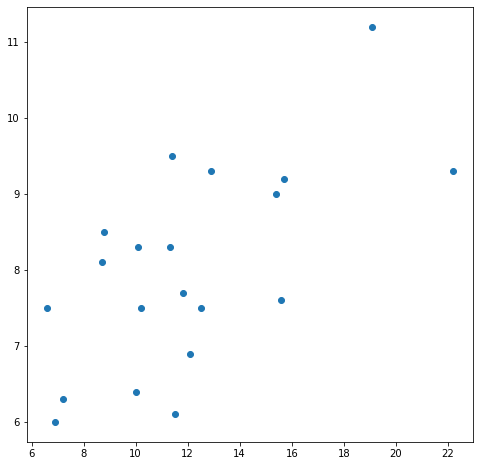

In [132]:
X2 = np.array([[12.1, 6.6, 11.5, 8.7, 15.4, 6.9, 8.8, 10.1, 19.1, 15.6, 22.2, 10.2, 15.7, 10.0, 7.2, 11.8, 11.3, 12.5, 11.4, 12.9],
               [6.9, 7.5, 6.1, 8.1, 9.0, 6.0, 8.5, 8.3, 11.2, 7.6, 9.3, 7.5, 9.2, 6.4, 6.3, 7.7, 8.3, 7.5, 9.5, 9.3]])


plt.scatter(X2[0,:], X2[1,:])
plt.show()

Numpy's built-in covariance function mean-centers the data automatically. Another way of calculating the covariance matrix is multiply it with its own transpose and divide by the number of observations. I have implemented this function as `Cov_wo_meancentering(X)` below. It should give the same result as `np.cov` with the arguments `rowvar=False, bias=True` if centering is also implemented. 

In [135]:
def Cov_wo_meancentering(X):
    X = X.T
    lenX = X.shape[0]
    covariance = X.T.dot(X)/lenX
    return covariance

#np.cov() will should be the same as meancentering X2 + using the defined function above ^^ 

* Without centering, i.e. mean subtracting, the data, find the covariance matrix of X2.
* Find the eigenvalues and eigenvectors of the covariance matrix. Reorder youreigenvectors and eigenvalues so that the eigenvector with the highest eigenvalue is in the first column.
* Transform the data X2 into the principal component space and plot each point, show your plot.
* Now redo the previous three steps, but subtract the mean of each dimension from all of the data points how is it different?

Cov with NO mean centering =  [[159.253   99.4075]
 [ 99.4075  65.861 ]]
PC1 without centering =  [0.84414773 0.53611064]
PC2 without centering = [-0.53611064  0.84414773]
Lambda1 without centering = 222.38580984627845
Lambda2 without centering = 2.7281901537215125


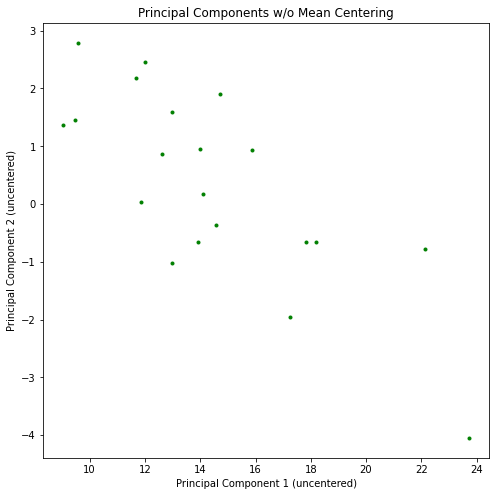

Cov WITH centering =  [[16.05578947  3.46052632]
 [ 3.46052632  1.79042105]]
PC1 with centering =  [0.9746031  0.22393927]
PC2 with centering = [-0.22393927  0.9746031 ]
Lambda1 with centering = 16.850931347865032
Lambda2 with centering = 0.9952791784507586


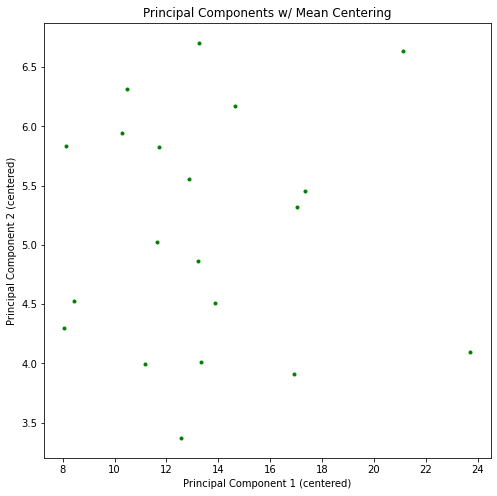

In [155]:
###### uncentered data ######
C_uncen = Cov_wo_meancentering(X2) #covariance of X2 without mean centering
print('Cov with NO mean centering = ',C_uncen)  

evals_uncen, evecs_uncen = np.linalg.eig(C_uncen) # Find the eigenvectors & eigenvalues of the covariance matrix 
idx = evals_uncen.argsort()[::-1] #Warning: linalg.eig gives unordered evals and evecs 

evals_uncen = evals_uncen[idx]
evecs_uncen = evecs_uncen[:,idx] #Columns are eigenvectors (reshuffle columns here)

print('PC1 without centering = ', evecs_uncen[:,0]) 
print('PC2 without centering =', evecs_uncen[:,1])
print('Lambda1 without centering =', evals_uncen[0]) 
print('Lambda2 without centering =', evals_uncen[1])

# RE-project the data back onto the principal components 
Xuncen_reproj = evecs_uncen.T @ X2
plt.plot(Xuncen_reproj[0,:],Xuncen_reproj[1,:], '.', color = 'green')

plt.title('Principal Components w/o Mean Centering')
plt.xlabel('Principal Component 1 (uncentered)')
plt.ylabel('Principal Component 2 (uncentered)')
plt.show()

###### centered data ######

C_cen = np.cov(X2) #covariance of X2 without mean centering
print('Cov WITH centering = ',C_cen)  

evals_cen, evecs_cen = np.linalg.eig(C_cen) # Find the eigenvectors & eigenvalues of the covariance matrix 
idx = evals_cen.argsort()[::-1] #Warning: linalg.eig gives unordered evals and evecs 

evals_cen = evals_cen[idx]
evecs_cen = evecs_cen[:,idx] #Columns are eigenvectors (reshuffle columns here)

print('PC1 with centering = ', evecs_cen[:,0]) 
print('PC2 with centering =', evecs_cen[:,1])
print('Lambda1 with centering =', evals_cen[0]) 
print('Lambda2 with centering =', evals_cen[1])

# RE-project the data back onto the principal components 
Xcen_reproj = evecs_cen.T @ X2
plt.plot(Xcen_reproj[0,:],Xcen_reproj[1,:], '.', color = 'green')

plt.title('Principal Components w/ Mean Centering')
plt.xlabel('Principal Component 1 (centered)')
plt.ylabel('Principal Component 2 (centered)')
plt.show()

#### Question 4: PCA in High dimensions

Download and load the gene expression matrix X `X = np.load('geneExpressionMat_X.npy')`

X is a truncated gene expression matrix of the first 2000 genes across 8 days of sampling the fibroblast response to ectopic expression of transcription factors Oct4, Sox2, Klf4, c-Myc. These factors are called the Yamanaka Factors after [Shinya Yamanaka](https://en.wikipedia.org/wiki/Shinya_Yamanaka) who won a nobel prize for his discovery.  They enabled the creation of [induced pluripotent stem cells](https://en.wikipedia.org/wiki/Induced_pluripotent_stem_cell) which are dedifferentiated, somatic cells that are of enormous experimental value for their use in creating all cell types of the body. 

In this data set, the columns of X are replicates of the reprogramming process in the following order counted in days `[0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`.
 
* Mean center X by its genes (rows)
* Find the covariance matrix of X (This may take a minute to run and is a small taste of the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* Sort the eigenvalues and eigenvectors and plot their real part with the Y axis being log scale `plt.semilogy(evals.real)`

* Reproject the data back onto to first two principal components and plot the experiments (originally the columns) on PC1 vs PC2.

* What type of variance does PC1 capture about the experiment? what about PC2?

Hint: Color each point by its day in the experiment.

`group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8]`
`plt.scatter(` some array`,` another array`, c=group, label=group,s=80)`

*See the **appendix** below for info on data munging*


Text(0, 0.5, 'log-scaled Eigenvalue')

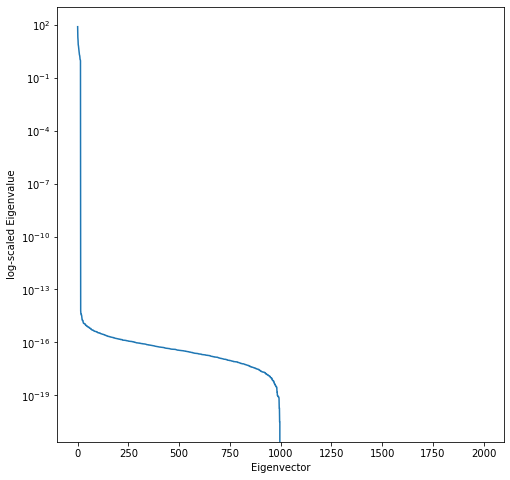

In [181]:
X = np.load('geneExpressionMat_X.npy') 

Y = X - np.mean(X, axis = 1).reshape(2000,1) #mean centering matrix X 
CX = np.cov(X) #covariance of mean centered matrix X 

evalsX, evecsX = np.linalg.eig(CX) # Find the eigenvectors & eigenvalues of the covariance matrix 
idx = evalsX.argsort()[::-1] #Warning: linalg.eig gives unordered evals and evecs 
evalsX = evalsX[idx]
evecsX = evecsX[:,idx] #Columns are eigenvectors (reshuffle columns here)

plt.semilogy(evalsX.real) #plot real part of eigenval with log-sclaed Y-axis 

plt.xlabel('Eigenvector')
plt.ylabel('log-scaled Eigenvalue')

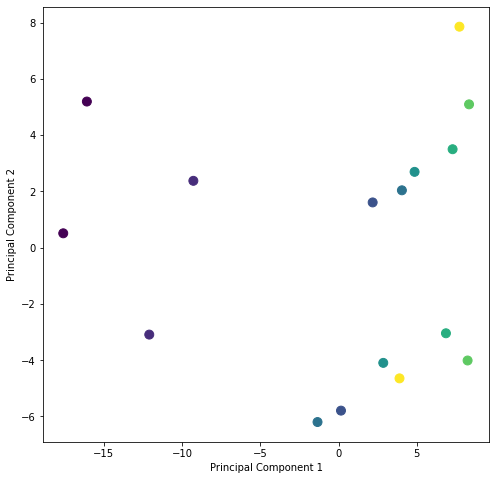

In [180]:
# RE-project the data back onto the principal components 
X_reproj = evecsX.T @ Y

group = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,8,8] 
plt.scatter( X_reproj[0,:], X_reproj[1,:], c=group, label=group,s=80)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Answer:
It appears that there is increasing variance over the time course, and there is alot of variablity within the first few days of the experiment, and becomes less variable over time. 

#### Question 5: SVD on Images
Read in the following the `Leopard_Spots.png` image into your python enviornment using the code provided below.

* Perform a singular value decomposition on this image to get U, D, and V-transpose. 

* Make a semilogy plot of the ranked singular values

* Reconstruct an approximation of the image using 1, 2, 4, 8, 16, and 32 of the singular values.

* Dot-indexing a numpy array using the .nbytes call will return the number of bytes required to store a numpy array. Calculate the number of bytes to store the the full U, D, and V-transpose matrices. How much memory can you save by using the first 32 singular values?




Text(0.5, 1.0, 'Plot of Ranked Singular Values')

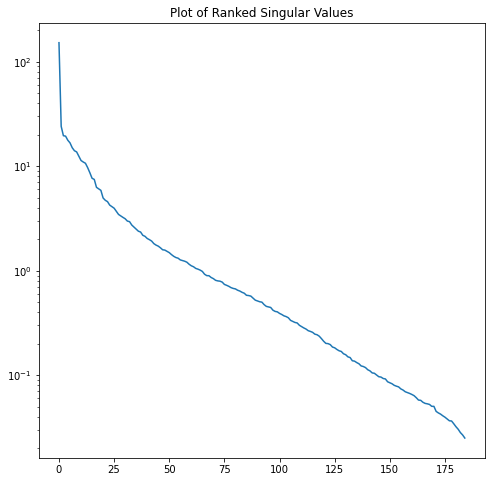

In [190]:
im = plt.imread('Leopard_Spots.png') #read image
im = np.mean(im,-1)#converts RGB image to grayscale
U, S, VT = np.linalg.svd(im, full_matrices=True)
plt.semilogy(S.real)
plt.title('Plot of Ranked Singular Values')

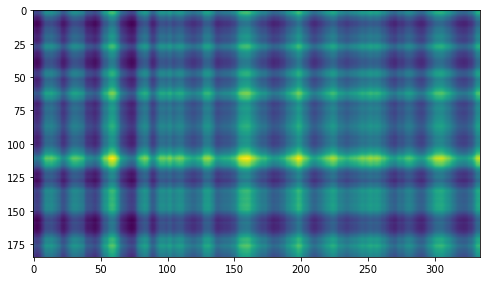

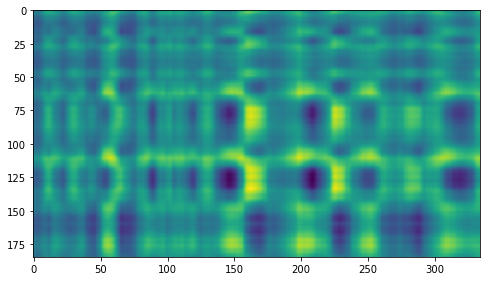

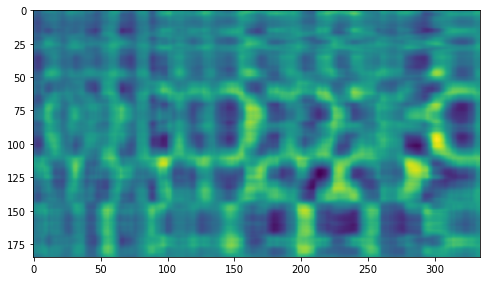

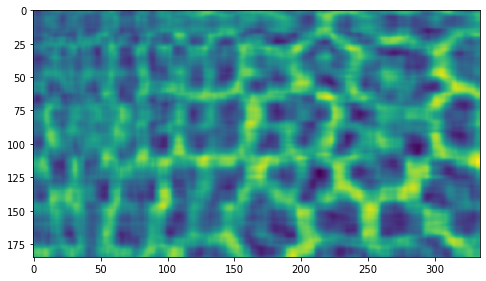

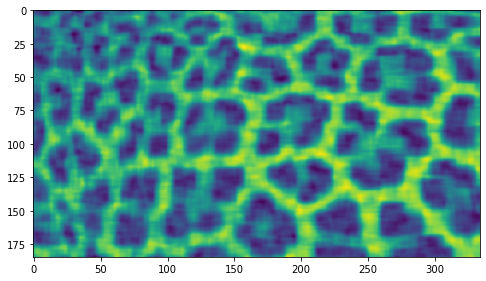

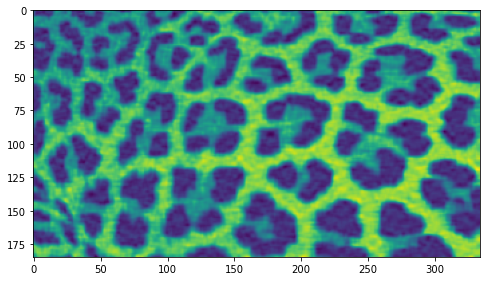

In [195]:
r = [1, 2, 4, 8, 16, 32]

for i in r: 
    U_rd = U[:,:i]
    D_rd = np.diag(S[:i])
    VT_rd = VT[:i,:]
    
    im_approx = U_rd @ D_rd @ VT_rd
    plt.imshow(im_approx)
    plt.show() # this plots ever figure throughout each iteration 

In [204]:
print('number of bytes to store the the full U, D, and V-transpose matrices:') 
D = np.diag(S[:])
print('U bytes =', U.nbytes)
print('D bytes =', D.nbytes)
print('VT bytes =', VT.nbytes)

print('How much memory can you save by using the first 32 singular values?')

#bytes if you use the first 32 singular values 
U_32 = U[:,:32].nbytes
D_32 = np.diag(S[:32]).nbytes
VT_32 = VT[:32,:].nbytes

print('U save =', U.nbytes - U_32)
print('D save =', D.nbytes - D_32)
print('VT save =', VT.nbytes - VT_32)

number of bytes to store the the full U, D, and V-transpose matrices:
U bytes = 136900
D bytes = 136900
VT bytes = 446224
How much memory can you save by using the first 32 singular values?
U save = 113220
D save = 132804
VT save = 403472


#### Question 6: Differentiating between normal and cancerous cells (extra credit, not optional for grads)

PCA is a very important technique for finding fundamental differences between normal and cancerous cells. 
Download and import the `ovariancancer_obs.csv` dataset which contains gene data for 216 patients, 121 of whom have ovarian cancer and 95 of whom do not. For each patient there is a vector of data containing the expression of 4000 genes. The `ovariancancer_grp.csv` file contains the labels for the observations matrix. 

Perform a PCA on the observation. Reproject the data on the first 3 principal components and plot them while labeling the points as cancerous or normal. What principal component captures the variance that differentiates cancer from normal tissue?



#### Appendix
Methods for downloading and munging gene expression datasets from the Gene Expression Omnibus 

Open a terminal and type `pip install GEOparse` to install the package onto your computer

Go to the [GEO database website](https://www.ncbi.nlm.nih.gov/sites/GDSbrowser) and browse through the datasets to find a unique ID.

In [ ]:
import GEOparse
import pandas as pd

# Downloading data set from the internet
gds = GEOparse.get_GEO(geo="GDS5316", destdir="./")
gds.metadata # see metadate

In [ ]:
#Explore the data
gds.columns #See columns of the experiment
gds.table #See datatable

In [ ]:
#Subset the data on the columns that you are interested in analyzing
cols = ['GSM943794','GSM943796','GSM943798','GSM943800','GSM943802','GSM943804','GSM943806','GSM943808',]
data = gds.table[cols]

#Remove rows with NaN - missing values
data = data.dropna()

#Convert to a numpy array for further analysis
X = data.to_numpy()